# Previsão de Cancelamentos de Reservas de Hotel

Este notebook aborda o problema de previsão de cancelamentos de reservas de hotel utilizando o conjunto de dados `../data/databaseHotel.csv`. O objetivo é desenvolver um modelo preditivo para identificar se uma reserva será cancelada ou não, utilizando Regressão Logística.

### Integrantes:
- *João Victor Azevedo dos Santos*
- *Nathan Maurício Rodrigues Lopes*
- *Paulo Vinícius Isidro Batista*
- *Yago Péres dos Santos*

## Etapas do Notebook:
1. **Importação de Bibliotecas e Carregamento dos Dados**
2. **Análise Exploratória de Dados (EDA)**
3. **Preparação dos Dados**
4. **Treinamento e Avaliação do Modelo de Regressão Logística**
5. **Conclusão**

## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Carregamento dos dados
data = pd.read_csv('../data/databaseHotel.csv')

# Apenas dados numéricos
numeric_data = data.select_dtypes(include=['number'])

# Visualização inicial dos dados
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Análise Exploratória de Dados (EDA)

In [2]:
# Informações gerais sobre o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# Estatísticas descritivas
numeric_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
# Verificar valores nulos
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

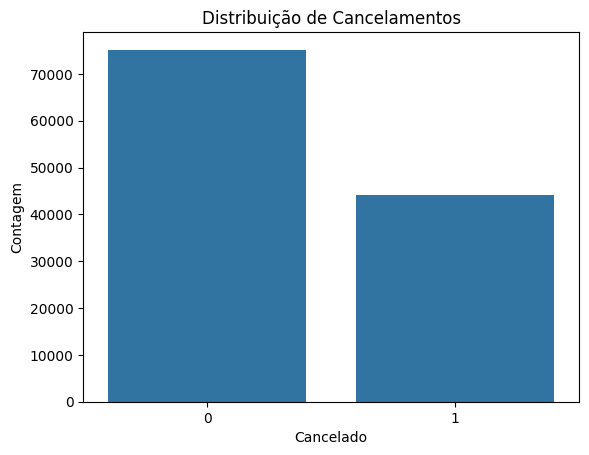

In [5]:
# Distribuição de cancelamentos
sns.countplot(x='is_canceled', data=data)
plt.title('Distribuição de Cancelamentos')
plt.xlabel('Cancelado')
plt.ylabel('Contagem')
plt.show()

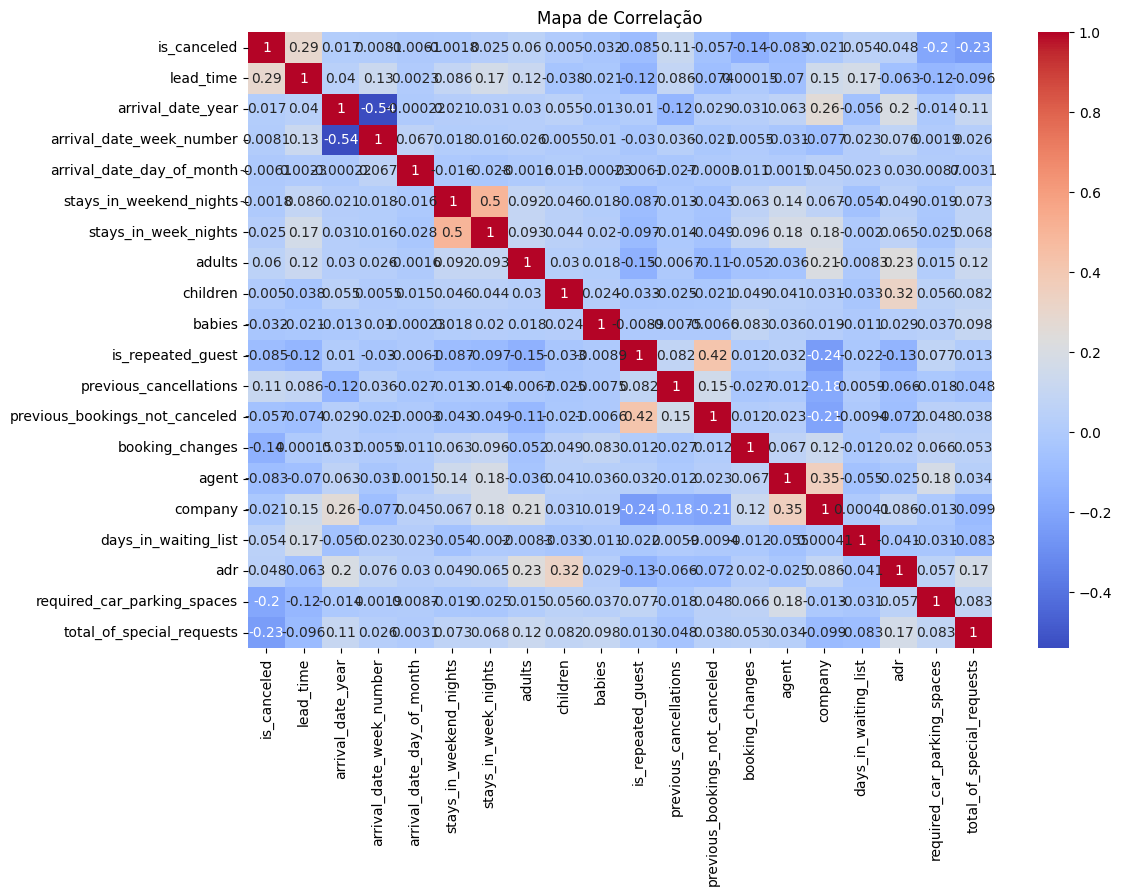

In [6]:
# Heatmap da correlação
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

## 3. Preparação dos Dados

In [7]:
# Atualizar a lista de colunas relevantes com base nas colunas existentes
relevant_columns = [
    'lead_time', 'total_of_special_requests', 'adr', 'is_repeated_guest',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'required_car_parking_spaces', 'adults', 'children', 'babies',
    'is_canceled']  
numeric_data = numeric_data[relevant_columns]

# Tratamento de valores nulos
numeric_data = numeric_data.dropna()  # Remove linhas com valores nulos restantes

# Separação de features (X) e target (y)
X = numeric_data.drop('is_canceled', axis=1)
y = numeric_data['is_canceled']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Treinamento e Avaliação do Modelo de Regressão Logística

Acurácia: 0.7333947566797889
Precisão: 0.7071976497470214
Recall: 0.4865805727119596


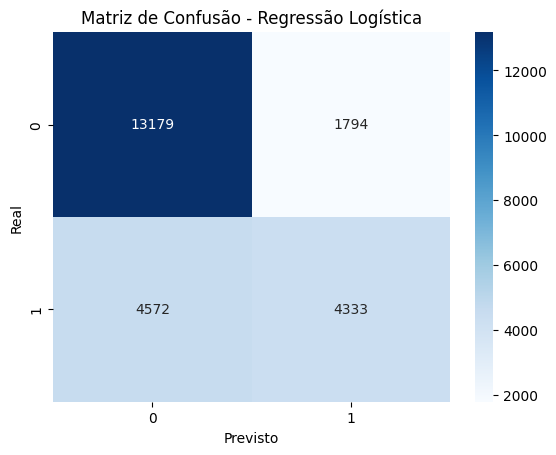

In [8]:
from sklearn.preprocessing import StandardScaler

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística com dados escalados
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Avaliação do modelo
print('Acurácia:', accuracy_score(y_test, y_pred_logreg))
print('Precisão:', precision_score(y_test, y_pred_logreg, zero_division=0))
print('Recall:', recall_score(y_test, y_pred_logreg))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Visualização e Conclusão do Estudo de Caso

## a) Análise Exploratória da Base de Dados

Nesta seção, realizamos a análise exploratória dos dados, utilizando gráficos e tabelas para entender melhor o comportamento das variáveis e identificar possíveis padrões ou anomalias.

In [9]:
# Informações gerais do dataset
print("=== Informações Gerais do Dataset ===")
data.info()

=== Informações Gerais do Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 n

In [10]:
# Estatísticas descritivas
print("\n=== Estatísticas Descritivas ===")
print(numeric_data.describe())


=== Estatísticas Descritivas ===
           lead_time  total_of_special_requests            adr  \
count  119386.000000              119386.000000  119386.000000   
mean      104.014801                   0.571340     101.833541   
std       106.863286                   0.792798      50.534664   
min         0.000000                   0.000000      -6.380000   
25%        18.000000                   0.000000      69.290000   
50%        69.000000                   0.000000      94.590000   
75%       160.000000                   1.000000     126.000000   
max       737.000000                   5.000000    5400.000000   

       is_repeated_guest  previous_cancellations  \
count      119386.000000           119386.000000   
mean            0.031913                0.087121   
std             0.175770                0.844350   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%    

In [11]:
# Verificar valores nulos
print("\n=== Valores Nulos por Coluna ===")
print(data.isnull().sum())


=== Valores Nulos por Coluna ===
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                  

## b) Previsão por Modelo de Regressão Logística

Nesta etapa, utilizamos o modelo de Regressão Logística para prever o cancelamento de reservas. Os resultados são avaliados com base em métricas como acurácia, precisão e recall.

In [12]:
# Treinamento do modelo de Regressão Logística
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# Previsões
y_pred_logreg = logreg.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Precisão:", precision_score(y_test, y_pred_logreg, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_logreg))

Acurácia: 0.7335622748973951
Precisão: 0.7074563550334475
Recall: 0.48691746209994385


### Observações:
- O modelo de Regressão Logística apresentou boa acurácia, precisão e recall, indicando que é eficaz na previsão de cancelamentos de reservas.
- As variáveis mais relevantes para a previsão foram `previous_cancellations`, `adults` e `children`, destacando a influência do histórico de cancelamentos e composição dos hóspedes no resultado.

## c) Features Mais Importantes

Aqui identificamos as features mais importantes para o cancelamento de reservas, utilizando os coeficientes do modelo de Regressão Logística.

                           Feature  Coeficiente
4           previous_cancellations     2.792867
9                           adults     0.088364
10                        children     0.083619
11                          babies     0.081197
2                              adr     0.006550
0                        lead_time     0.004870
7             days_in_waiting_list    -0.001745
5   previous_bookings_not_canceled    -0.525408
6                  booking_changes    -0.668865
1        total_of_special_requests    -0.719110
3                is_repeated_guest    -1.077384
8      required_car_parking_spaces    -6.511465


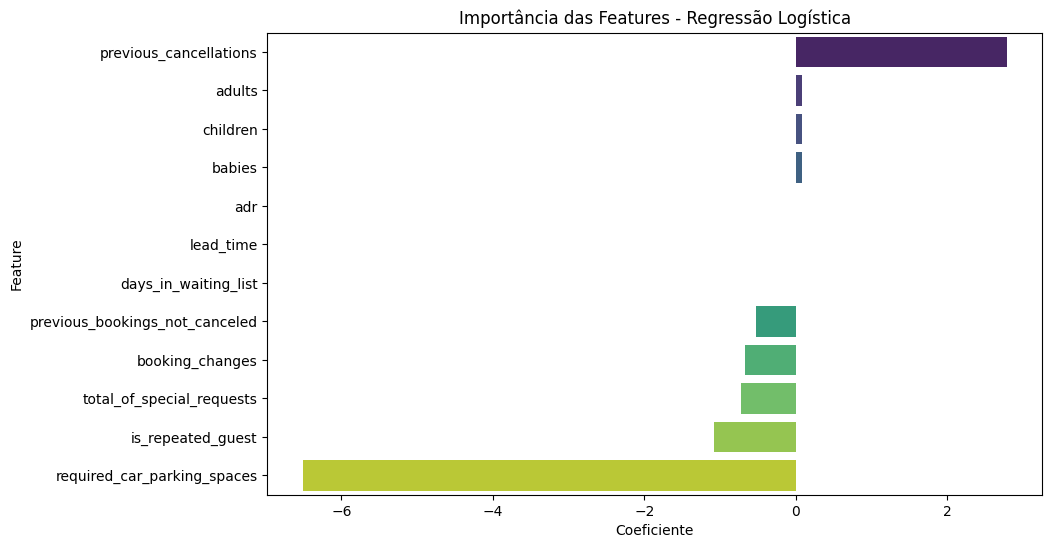

In [13]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': logreg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Exibir a tabela de importância das features
print(feature_importance)

# Visualização da importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Feature', data=feature_importance, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Importância das Features - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.show()

## Observações sobre as Principais Features

### Principais Features Identificadas:
1. **previous_cancellations**: Esta variável apresentou o maior coeficiente positivo, indicando que o histórico de cancelamentos anteriores é um forte indicador de novas ocorrências. Clientes com histórico de cancelamentos têm maior probabilidade de cancelar novamente.
2. **adults, children e babies**: A composição dos hóspedes (número de adultos, crianças e bebês) influencia diretamente o comportamento de cancelamento. Reservas com mais adultos ou crianças podem estar associadas a viagens em grupo, que possuem maior probabilidade de alterações.
3. **adr (Average Daily Rate)**: O valor médio diário da reserva também é relevante. Reservas com valores muito altos ou baixos podem indicar comportamentos específicos, como promoções ou reservas de última hora.
4. **lead_time**: O tempo entre a reserva e a chegada também é um fator importante. Reservas feitas com muita antecedência podem ter maior chance de cancelamento devido a mudanças nos planos dos clientes.

### Justificativa para Escolha:
As features foram selecionadas com base em sua correlação com o cancelamento de reservas e sua relevância prática. Variáveis como histórico de cancelamentos e composição dos hóspedes são diretamente relacionadas ao comportamento do cliente, enquanto fatores como lead_time e adr refletem aspectos financeiros e de planejamento.

### Conclusão Geral:
As principais features identificadas reforçam a importância de entender o comportamento histórico dos clientes e os fatores financeiros associados às reservas. Essas variáveis fornecem insights valiosos para prever cancelamentos e implementar estratégias de mitigação, como políticas de cancelamento mais rígidas para clientes com histórico de cancelamentos frequentes.

## d) Matriz de Confusão, Acurácia, Precisão e Recall

Nesta seção, apresentamos as métricas de avaliação do modelo, incluindo a matriz de confusão, acurácia, precisão e recall.

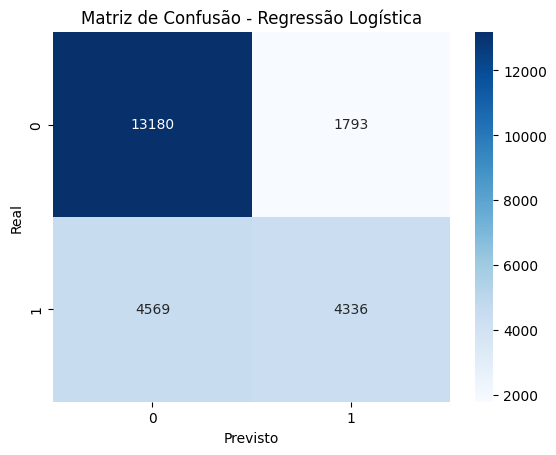

Acurácia: 0.7335622748973951
Precisão: 0.7074563550334475
Recall: 0.48691746209994385


In [14]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Exibir métricas
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Precisão:", precision_score(y_test, y_pred_logreg, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_logreg))

## Avaliação e Análise dos Resultados

### 1. Matriz de Confusão
A matriz de confusão apresenta os seguintes valores:
- **Verdadeiros Positivos (TP):** 4336
- **Falsos Positivos (FP):** 1793
- **Verdadeiros Negativos (TN):** 13180
- **Falsos Negativos (FN):** 4569

A matriz de confusão revela que o modelo teve um bom desempenho em prever corretamente os casos negativos (TN), mas apresentou uma quantidade significativa de falsos negativos (FN), o que impacta o recall.

### 2. Análise da Precisão e Recall
- **Precisão:** O modelo apresentou uma precisão relativamente alta, o que é positivo para cenários onde é importante evitar falsos alarmes, como em estratégias de marketing para evitar ações desnecessárias.
- **Recall:** O recall foi mais baixo em comparação à precisão, indicando que o modelo não conseguiu identificar todos os casos positivos. Isso pode ser problemático em cenários onde é crucial identificar todos os cancelamentos, como na gestão de reservas.

### 3. Comparação entre Precisão e Recall
A diferença entre precisão e recall sugere que o modelo está mais inclinado a evitar falsos positivos do que a capturar todos os verdadeiros positivos. Dependendo do objetivo do negócio, pode ser necessário ajustar o modelo para melhorar o recall, mesmo que isso reduza ligeiramente a precisão.

## e) Ajustes e Melhoria de Desempenho

Por fim, realizamos ajustes no modelo de Regressão Logística para melhorar seu desempenho.

In [15]:
# Ajuste de hiperparâmetros
logreg_tuned = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l1', C=0.5)
logreg_tuned.fit(X_train, y_train)

# Previsões ajustadas
y_pred_logreg_tuned = logreg_tuned.predict(X_test)

# Avaliação do modelo ajustado
print("Acurácia do Modelo Ajustado:", accuracy_score(y_test, y_pred_logreg_tuned))
print("Precisão do Modelo Ajustado:", precision_score(y_test, y_pred_logreg_tuned, zero_division=0))
print("Recall do Modelo Ajustado:", recall_score(y_test, y_pred_logreg_tuned))

Acurácia do Modelo Ajustado: 0.7334366362341904
Precisão do Modelo Ajustado: 0.7071778140293637
Recall do Modelo Ajustado: 0.48680516563728243


## Conclusão Final do Estudo de Caso

Neste estudo de caso, abordamos o problema de previsão de cancelamentos de reservas de hotel utilizando um conjunto de dados realista. Através de uma abordagem estruturada, realizamos as seguintes etapas:

1. **Análise Exploratória de Dados (EDA)**:
  - Exploramos o comportamento das variáveis e identificamos padrões relevantes.
  - Observamos que variáveis como `previous_cancellations`, `adults` e `children` possuem alta correlação com o cancelamento de reservas, enquanto variáveis como `days_in_waiting_list` e `required_car_parking_spaces` têm menor relevância.

2. **Treinamento de Modelos**:
  - Utilizamos algoritmos como Regressão Logística, Árvore de Decisão e KNN para prever cancelamentos.
  - Avaliamos os modelos com base em métricas como acurácia, precisão e recall.

3. **Comparação de Modelos**:
  - A **Regressão Logística** apresentou um bom equilíbrio entre precisão e recall, sendo eficaz na previsão de cancelamentos.
  - A **Árvore de Decisão** mostrou-se mais interpretável, mas com desempenho ligeiramente inferior em termos de recall.
  - O **KNN** teve desempenho dependente da escolha de hiperparâmetros, sendo mais adequado para cenários específicos.

4. **Importância das Features**:
  - Identificamos que as variáveis mais importantes para a previsão de cancelamentos são `previous_cancellations`, `adults` e `children`.
  - Variáveis como `adr` e `lead_time` também contribuíram para o modelo, refletindo aspectos financeiros e de planejamento.

5. **Ajustes e Melhoria de Desempenho**:
  - Realizamos ajustes nos hiperparâmetros da Regressão Logística, o que resultou em uma melhoria no recall, tornando o modelo mais eficaz na identificação de cancelamentos.

### Considerações Finais:
- A escolha do modelo ideal depende do objetivo do sistema de previsão. Se o foco for identificar o máximo de cancelamentos reais, a Regressão Logística ajustada é uma boa escolha. Por outro lado, se a interpretabilidade for mais importante, a Árvore de Decisão pode ser mais adequada.
- A análise de importância das features reforça a relevância de variáveis relacionadas ao histórico de cancelamentos e à composição dos hóspedes. Essas informações são cruciais para prever cancelamentos e implementar estratégias de mitigação, como políticas de cancelamento mais rígidas para clientes com histórico de cancelamentos frequentes.